# Case Study
1. Data
2. Data Overview
3. Data Processing
4. Exploratory Data Analysis
5. Split Data
6. Model Building

In [1]:
# importing all the neccesary libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, scorer, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import statsmodels.api as sm
from scipy import stats

# 1.Data

In [2]:
# read the csv problem file and displaying the info of the file as well
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Project 5 Dataset.csv")
df_o = df.copy()
df.head(10)


,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,...,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,...,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,...,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,...,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,...,0,0.82,0.81,0,0,0,1,17.072697,0,0
5,1566137,6648,2327,6.0,1404,0,11604,23532,35880,10516,...,0,0.74,0.50,0,0,0,1,17.073619,0,0
6,3265646,10,3,8.0,0,0,3,12,21,3,...,0,0.98,0.98,0,0,0,1,17.078496,0,0
7,2809957,22,0,8.0,1,0,0,0,3,5,...,0,0.99,0.99,0,0,0,1,17.091436,0,0
8,1240251,160,43,8.0,13,0,0,120,180,15,...,0,1.00,1.00,0,0,0,1,17.049562,0,0
9,1784378,8,0,12.0,0,0,0,0,0,0,...,0,0.74,0.74,0,0,0,1,17.051237,0,0


# 2. Data Overview

In [3]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nUnique values :  \n", df.nunique())
print ("\nData Description : \n", df.describe())

Rows     :  34281
Columns  :  25

Features : 
 ['ID', 'IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'Target']

Unique values :  
 ID        34281
IV         1897
A1          777
A2           24
A3          606
A4          169
A5         1248
A6         1639
A7         1956
A8          791
A9         1368
A10        1867
A11           1
A12        2230
A13           2
A14         156
A15         102
A16         102
A17           2
A18           2
A19           2
A20           2
A21       34220
A22           2
Target        2
dtype: int64

Data Description : 
                  ID             IV            A1            A2            A3  \
count  3.428100e+04   34281.000000  34281.000000  32538.000000  34281.000000   
mean   1.979838e+06     236.252005     36.126367      7.355185     22.543071   
std    6.384855e+05    3326.574620    427.707021      6.165307    359.486291   
min    1.0

In [4]:
# Finding Missing Data saved as -99.00 or -999.00 etc
df[df.iloc[:,2:] == -9.00] = np.nan
df[df.iloc[:,2:] == -99.00] = np.nan
df[df.iloc[:,2:] == -999.00] = np.nan
df[df.iloc[:,2:] == -9999.00] = np.nan
df[df.iloc[:,2:] == -99999.00] = np.nan

print ("\nMissing values :  ", df.isna().sum().values.sum())
print ("\nMissing Values in each columns : \n", df.isna().sum())


Missing values :   6079

Missing Values in each columns : 
 ID           0
IV           0
A1           0
A2        1743
A3           0
A4           0
A5           0
A6           0
A7           0
A8           0
A9           0
A10          0
A11          0
A12          0
A13          0
A14          0
A15       2233
A16       2103
A17          0
A18          0
A19          0
A20          0
A21          0
A22          0
Target       0
dtype: int64


# 3. Data Processing

In [59]:
df = df.drop(['A11'], axis = 1)

In [6]:
#customer id col
Id_col     = ['ID']
#Target columns
target_col = ["Target"]
#categorical columns
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col + Id_col]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

def replace_na(df, cat_cols, target_cols, num_cols, Id_col):
    for i in df.columns:
        if i in cat_cols + target_col:
            df[i][df[i].isna() == True] = df[i].mode()
        elif i in num_cols:
            df[i][df[i].isna() == True] = df[i].median()
    df = df.dropna()
    return df

In [7]:
df = replace_na(df, cat_cols, target_col, num_cols, Id_col)

z = np.abs(stats.zscore(df[num_cols]))
#df = df[(z < 3).all(axis=1)]
df[num_cols][(z >= 3).any(axis = 1)] = np.nan
df[num_cols][(z <= -3).any(axis = 1)] = np.nan

df = replace_na(df, cat_cols, target_col, num_cols, Id_col)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\HP\Anacond

In [9]:
print ('Number of Outliers to be replaced : ', np.shape(np.where(z>3))[1])
print ("\nUnique values :  \n", df.nunique())
drop_cols = df.nunique()[df.nunique() <= 1].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col + Id_col + drop_cols]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col + drop_cols]
df = df.drop(drop_cols, axis = 1)

Number of Outliers to be replaced :  3838

Unique values :  
 ID        34281
IV         1897
A1          777
A2           24
A3          606
A4          169
A5         1248
A6         1639
A7         1956
A8          791
A9         1368
A10        1867
A11           1
A12        2230
A13           2
A14         156
A15         101
A16         101
A17           2
A18           2
A19           2
A20           2
A21       34220
A22           2
Target        2
dtype: int64


# 4. Exploratary Data Analysis

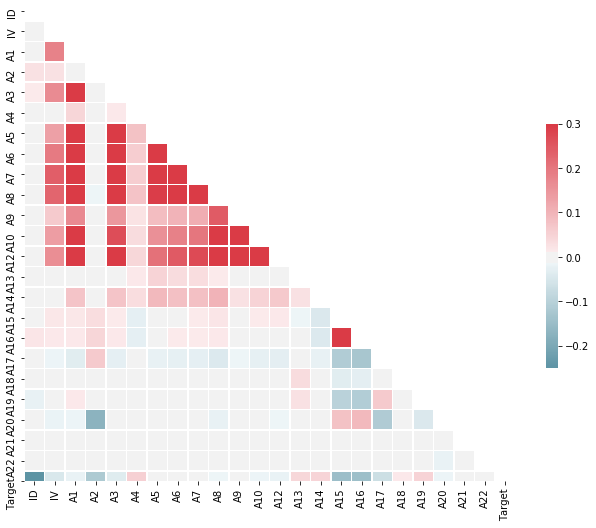

In [20]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (11,9))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask = mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot = False)
plt.show()

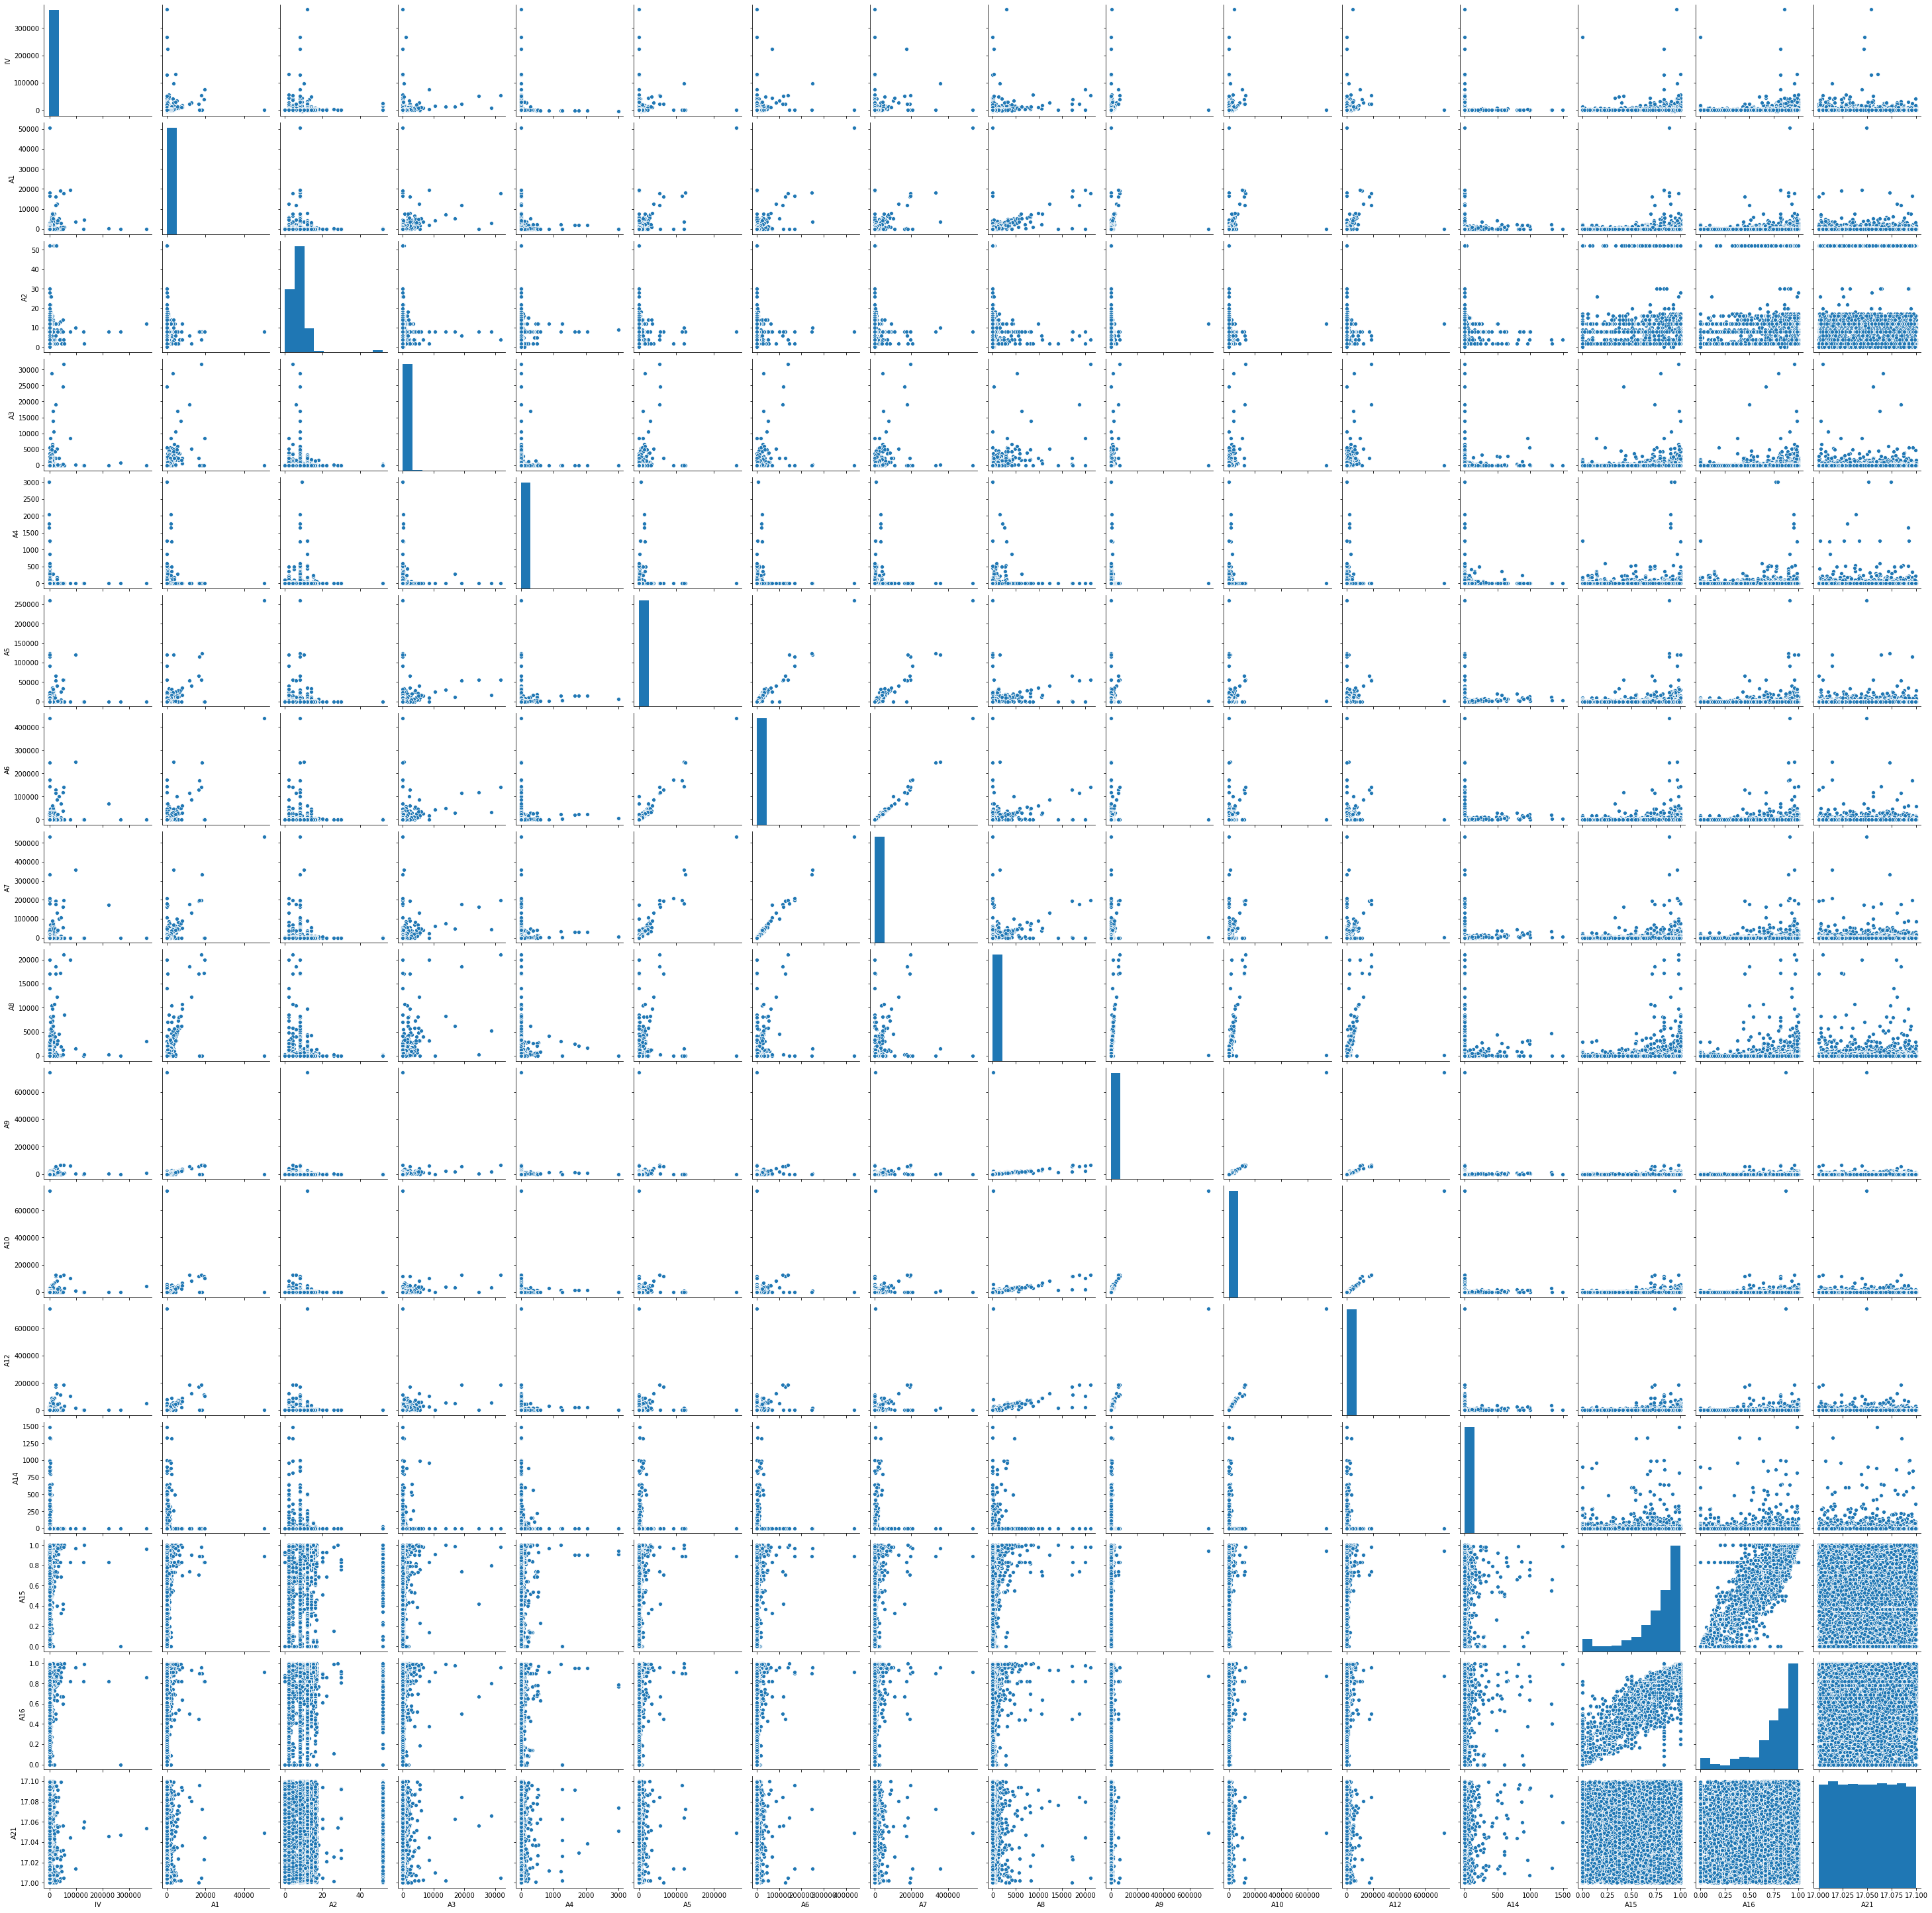

In [64]:
sns.pairplot(df[num_cols], palette ='viridis',height = 2.5)
plt.show()

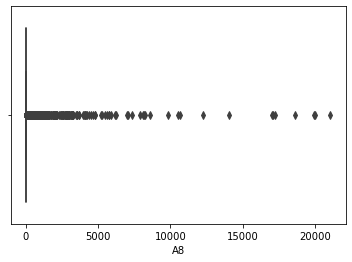

In [65]:
# boxplot of the column A2
#sns.boxplot(df['A2'])
sns.boxplot(df['A8'])

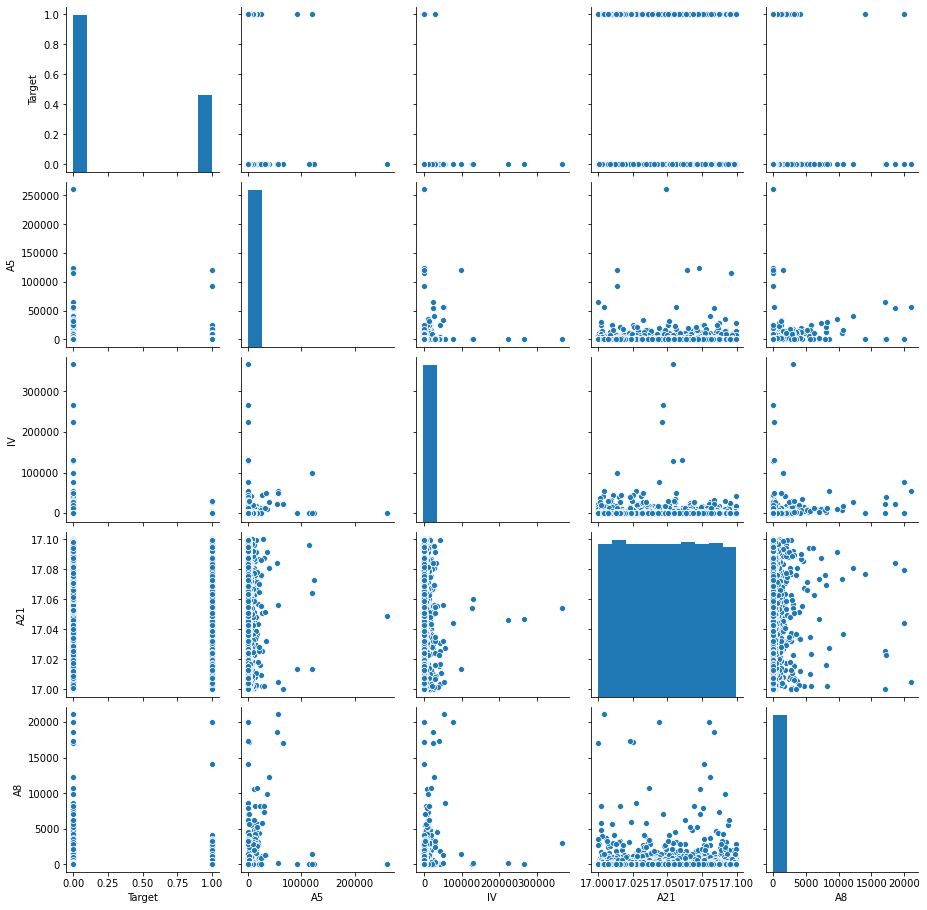

In [66]:
sns.pairplot(df[['Target', 'A5', 'IV', 'A21', 'A8']], palette ='viridis',height = 2.5)
plt.show()

# 5. Split Data

In [10]:
#splitting train and test data 
train,test = train_test_split(df ,test_size = .25 ,random_state = 12)
    
##seperating dependent and independent variables
cols    = [i for i in df.columns if i not in Id_col + target_col + drop_cols]
train_x = train[cols]
train_y = train[target_col]
test_x  = test[cols]
test_y  = test[target_col]

print(np.shape(train_x))
print(np.shape(train_y))
print(np.shape(test_x))
print(np.shape(test_y))

(25710, 22)
(25710, 1)
(8571, 22)
(8571, 1)


# 6. Model Building

In [11]:
def df_prediction(model, training_x, testing_x, training_y, testing_y, cols, cf, threshold_plot, pca = 'No') :
    
    if model == 'Logistic':
        algorithm = LogisticRegression()
        cf = 'coefficients'
        
    elif model == 'Logistic Summary':
        lr = sm.GLM(training_y,(sm.add_constant(training_x)), family = sm.families.Binomial())
        print (lr.fit().summary())
        algorithm = LogisticRegression()
        cf = 'coefficients'
        
    elif model == 'Decision Tree':
        algorithm = tree.DecisionTreeClassifier()
    
    elif model == 'Random Forest' and pca == 'Yes':
        algorithm = RandomForestClassifier(n_estimators = 500,max_features = 7)
    
    elif model == 'Random Forest':
        algorithm = RandomForestClassifier(n_estimators = 500,max_features = 20)
    
    elif model == 'Decision Tree Gini':
        algorithm = tree.DecisionTreeClassifier(criterion='gini')
    
    else:
        algorithm = model
    
    if pca == 'Yes':
        comp = 10
        pca = PCA(n_components = comp, svd_solver = 'full')
        pca_x = pca.fit_transform(train_x)
        training_x = pca_x
        testing_x = pca.fit_transform(test_x)
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    if pca != 'No':
        column_df = pd.DataFrame(range(1,11))
        print(pca)
        print('Variance explained by ', comp, 'components : ', pca.explained_variance_ratio_.sum(),'\n')
    coef_sumry    = (pd.merge(coefficients, column_df, left_index = True, right_index = True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients", ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n", classification_report(testing_y, predictions))
    print ("Accuracy   Score : ", accuracy_score(testing_y, predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, predictions) 
    print ("Area under curve : ", model_roc_auc, "\n")
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
    
    #plot confusion matrix
    plt.figure(figsize = (5, 5))
    labels = ['False', 'True']
    plt.title('Confusion Matrix')
    sns.heatmap(data = conf_matrix, xticklabels = labels, yticklabels = labels, annot = True)
    plt.show()
    
    #plot roc curve
    plt.figure(figsize = (5, 5))
    plt.title('Receiver Operating Characteristic')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    sns.lineplot(x = fpr, y = tpr)
    plt.show()
    
    #plot coeffs
    plt.figure(figsize = (10, 10))
    plt.title('Feature Importances')
    sns.barplot(x = coef_sumry['features'], y = coef_sumry['coefficients'])
    plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      5767
           1       0.85      0.89      0.87      2804

    accuracy                           0.91      8571
   macro avg       0.90      0.90      0.90      8571
weighted avg       0.91      0.91      0.91      8571

Accuracy   Score :  0.9113288997783222
Area under curve :  0.9046073421332996 



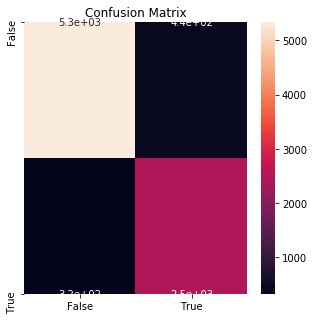

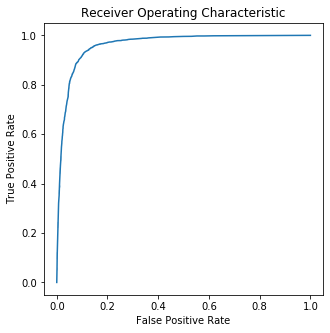

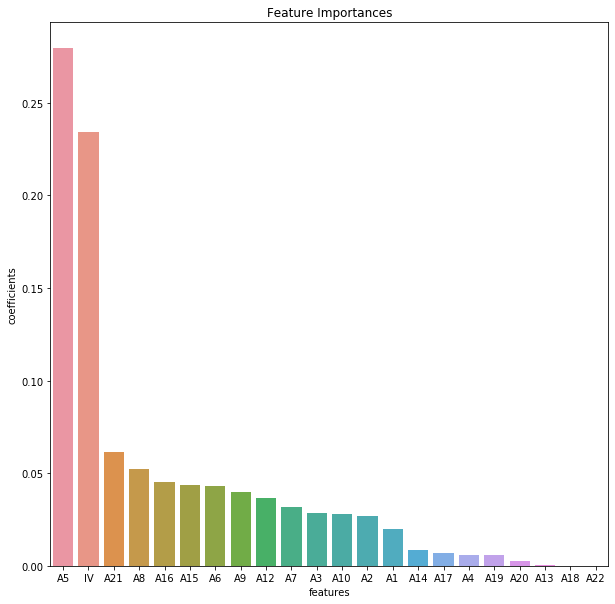

In [21]:
#Self Defined Function
#lr = LogisticRegression()
#df_prediction(lr, train_x, test_x, train_y, test_y, cols, 'coefficients', threshold_plot = True)

#Decision Tree
#df_prediction('Decision Tree', train_x, test_x, train_y, test_y, cols, "features", threshold_plot = True)

#Logistic
#df_prediction('Logistic', train_x, test_x, train_y, test_y, cols, 'coefficients', threshold_plot = True)

#Random Forest
df_prediction('Random Forest', train_x, test_x, train_y, test_y, cols, 'features', threshold_plot = True)

#Logisitic Summary
#df_prediction('Logistic Summary', train_x, test_x, train_y, test_y, cols, 'coefficients', threshold_plot = True)